In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/data-analyst.csv')

In [3]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [15]:
col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

In [16]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:
new_df = df[col]

In [19]:
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [23]:
new_df['training_hours'].isnull().sum()

766

In [26]:
new1_df = df[col].dropna()

In [28]:
new1_df.shape

(17182, 5)

In [30]:
df.shape

(19158, 13)

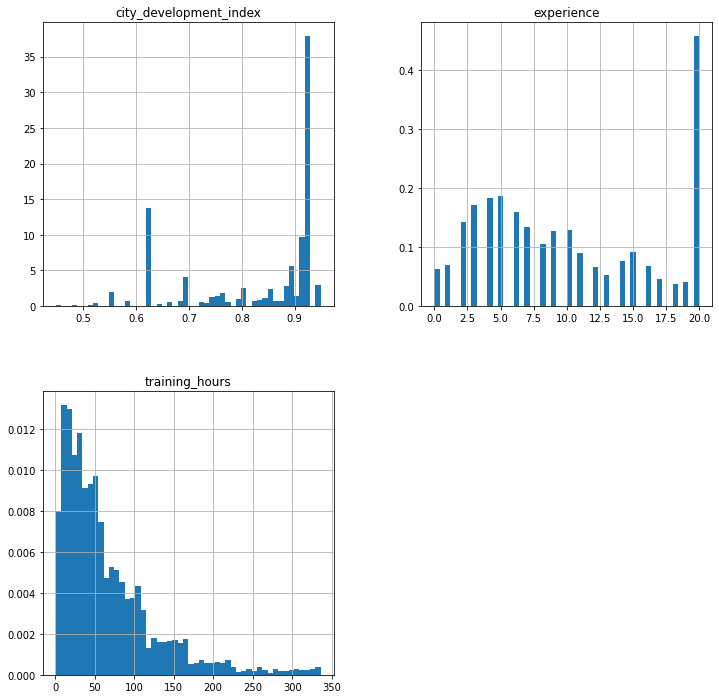

In [33]:
new1_df.hist(bins= 50,density=True, figsize=(12, 12))
plt.show()

In [34]:
new1_df.head(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


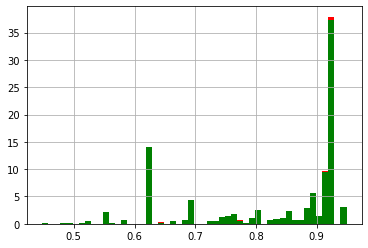

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
new1_df['city_development_index'].hist(bins= 50,ax = ax,density=True,color='red')
df['city_development_index'	].hist(bins= 50 ,ax =ax,density= True,color='green',alpha=0.8)



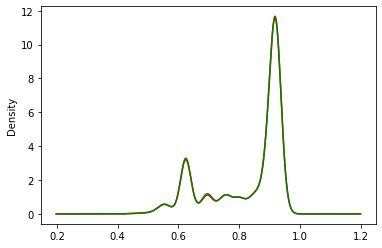

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
new1_df['city_development_index'].plot.density(color='red')
df['city_development_index'].plot.density(color='green')

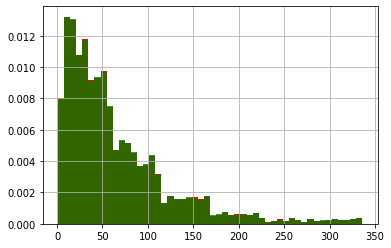

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

new1_df['training_hours'].hist(bins= 50,ax = ax,density=True,color='red')
df['training_hours'	].hist(bins= 50 ,ax =ax,density= True,color='green',alpha=0.8)


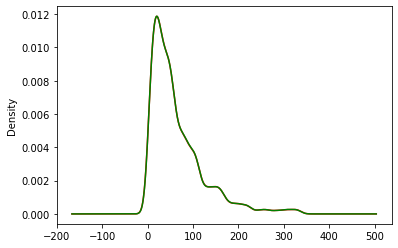

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
new1_df['training_hours'].plot.density(color='red')
df['training_hours'].plot.density(color='green')

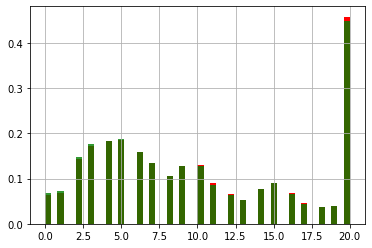

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
new1_df['experience'].hist(bins= 50,ax = ax,density=True,color='red')
df['experience'	].hist(bins= 50 ,ax =ax,density= True,color='green',alpha=0.8)

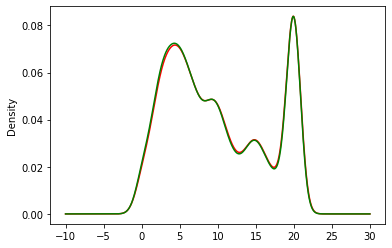

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
new1_df['experience'].plot.density(color='red')
df['experience'].plot.density(color='green')

In [53]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new1_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


In [54]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new1_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
